<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Below is an example of Python code for image classification using a convolutional neural network (CNN) with the Keras API in TensorFlow. This example uses the CIFAR-10 dataset, which consists of 60,000 images across 10 classes.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.2818 - loss: 1.9395 - val_accuracy: 0.4986 - val_loss: 1.3841
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.4801 - loss: 1.4351 - val_accuracy: 0.5836 - val_loss: 1.1784
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.5375 - loss: 1.2904 - val_accuracy: 0.6164 - val_loss: 1.1223
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.5766 - loss: 1.2079 - val_accuracy: 0.6376 - val_loss: 1.0480
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.5989 - loss: 1.1414 - val_accuracy: 0.6495 - val_loss: 1.0029
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6147 - loss: 1.0972 - val_accuracy: 0.6672 - val_loss: 0.9687
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6300 - loss: 1.0567 - val_accuracy: 0.6779 - val_loss: 0.9254
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6396 - loss: 1.0307 - 

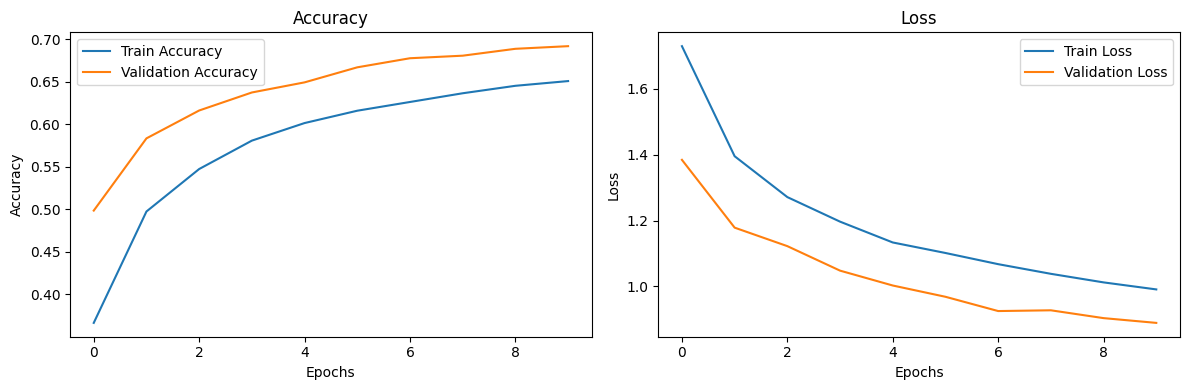

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


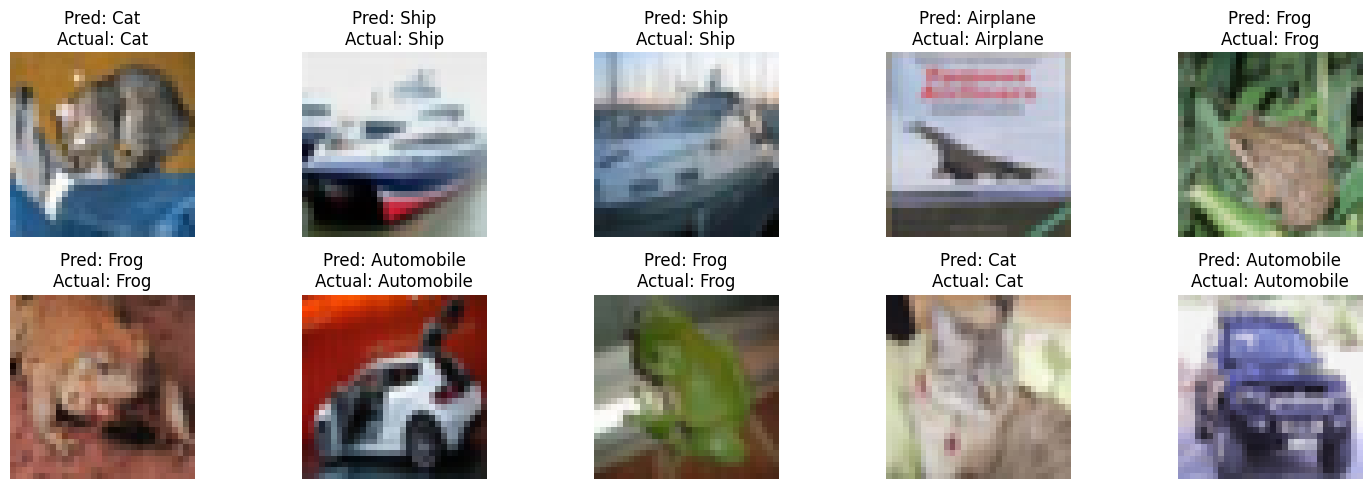

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test

# Build the CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Compile, train, and evaluate the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(x_test, y_test))

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy: {test_accuracy:.4f}")

    return history

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Show predictions
def show_predictions(model, x_test, y_test, class_names, num_images=10):
    """
    Display a few test images with their predicted and actual labels.
    """
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[true_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    # Load data
    x_train, y_train, x_test, y_test = load_data()

    # Class names for CIFAR-10
    class_names = [
        'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
        'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
    ]

    # Build model
    model = build_model()

    # Train model
    history = train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64)

    # Plot training history
    plot_history(history)

    # Show example predictions
    show_predictions(model, x_test, y_test, class_names)